<a href="https://colab.research.google.com/github/Epsita-R/Computer-Vision/blob/main/2348517_CV_Lab06.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

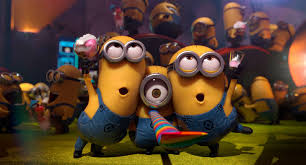

In [15]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow
image = cv2.imread("/content/cv.jpeg")
cv2_imshow(image)

Median filter

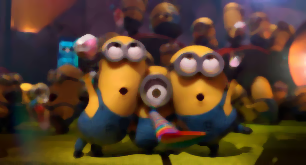

In [16]:
# Apply median filter
median_filtered_image = cv2.medianBlur(image, 5)
cv2_imshow(median_filtered_image)


Max and min filters

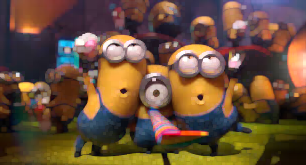

In [17]:
# Max Filter

# Define the kernel size
kernel_size = 3
max_filtered_image = cv2.dilate(image, np.ones((kernel_size, kernel_size), np.uint8))
cv2_imshow(max_filtered_image)

Max filter enhances bright regions in an image. It replaces each pixel with the maximum value of the pixel values in its neighborhood. This can be accomplished using the dilation operation.

> Add blockquote



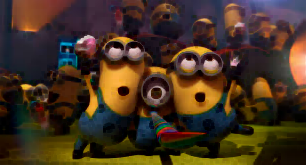

In [18]:
# Min Filter

min_filtered_image = cv2.erode(image, np.ones((kernel_size, kernel_size), np.uint8))
cv2_imshow(min_filtered_image)

A min filter emphasizes dark regions in an image. It replaces each pixel with the minimum value of the pixel values in its neighborhood. This can be achieved using the erosion operation.

Mid-point filter

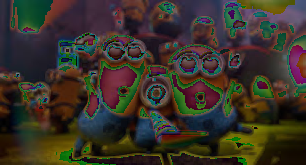

In [19]:
# Define the kernel size
kernel_size = 3

# Calculate mid-point filtered image
mid_point_image = (max_filtered_image + min_filtered_image) / 2
cv2_imshow(mid_point_image)

This mid-point filter aims to provide a balanced approach between the brightest and darkest regions within the defined neighborhood.

Alpha-trimmed filters

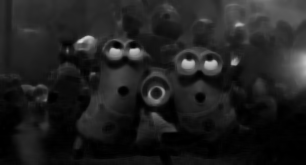

In [20]:
from google.colab.patches import cv2_imshow
# Define window size and alpha value
window_size = 5
# Number of extreme pixel values to discard on each side
alpha = 2

# Apply alpha-trimmed filter
padded_image = cv2.copyMakeBorder(image, alpha, alpha, alpha, alpha, cv2.BORDER_REFLECT)
filtered_image = np.zeros(image.shape, dtype=np.uint8)

for i in range(alpha, image.shape[0] + alpha):
    for j in range(alpha, image.shape[1] + alpha):
        window = padded_image[i-alpha:i+alpha+1, j-alpha:j+alpha+1]
        pixels = window.flatten()
        pixels.sort()
        trimmed_pixels = pixels[alpha:window_size**2-alpha]
        filtered_image[i-alpha, j-alpha] = np.mean(trimmed_pixels)
cv2_imshow(filtered_image)


Alpha-trimmed filters are non-linear filters used in image processing to remove noise and preserve image details. They work by calculating the mean of pixel values within a specified window after discarding a certain number of extreme pixel values. The alpha trimming parameter determines the number of extreme pixel values to discard.